<a href="https://colab.research.google.com/github/neelshah2409/IPL-Data-Analysis/blob/main/Data_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task- 2 Data Science and Machine Learning Internship


> Neel Shah


> L.D. College Of Engineering



> Topic : IPL Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()
data=pd.read_csv("./IPL Matches 2008-2020.csv")

Saving IPL Matches 2008-2020.csv to IPL Matches 2008-2020.csv


In [ ]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
#drop the "method" feature 
data.drop(['method'],axis= 1,inplace=True)

Most Wins IN IPL

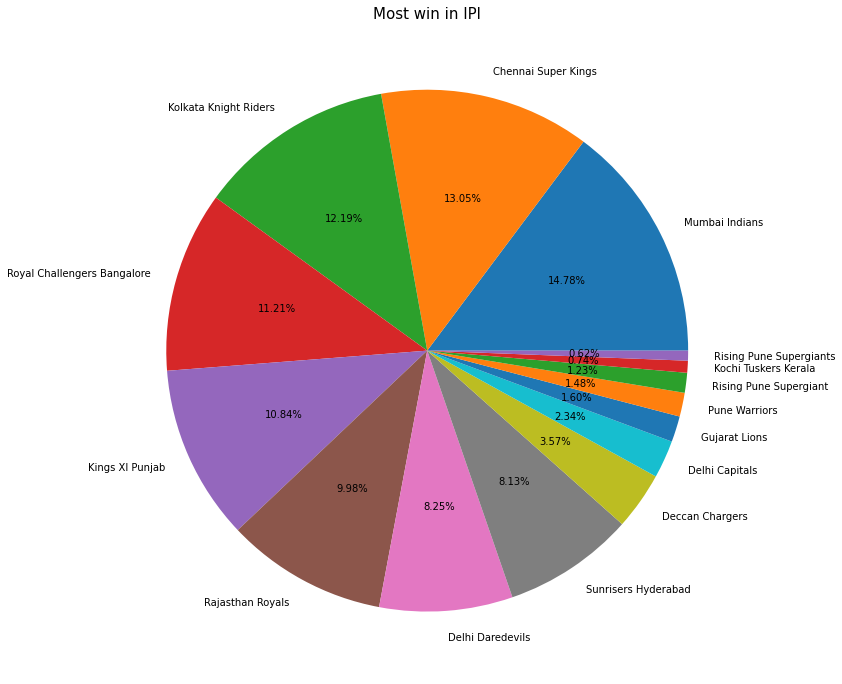

In [ ]:
temp=pd.DataFrame({"Winner":data['winner']})
count_wins = temp.value_counts()
labels = [X[0] for X in count_wins.keys()]

bar ,ax =plt.subplots(figsize=(20,12))
ax= plt.pie(x=count_wins,autopct="%.2f%%" ,labels=labels)
plt.title("Most win in IPl",fontsize=15)
plt.show()

Most wins in Elemenator

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


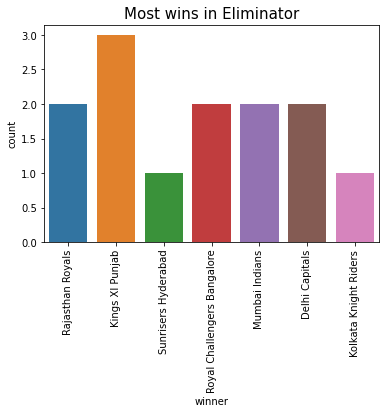

In [ ]:
snb.countplot(data['winner'][data['eliminator']=='Y'], data = data)
plt.title("Most wins in Eliminator",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Toss Decision

In [ ]:
teams= data['toss_winner'].unique()
descision_making = pd.DataFrame([],columns=['Toss Winner','Descision','Times'])
for id,element in enumerate(teams):
  temp_bat = data[(data['toss_winner']== element) & (data['toss_decision']== 'bat')]
  temp_fields = data[(data['toss_winner']== element) & (data['toss_decision']== 'field')]

  #append to descision_making
  descision_making= descision_making.append({'Toss Winner': element,
                                             'Descision':'bat','Times': temp_bat['toss_winner'].count()}, ignore_index= True)
  descision_making= descision_making.append({'Toss Winner': element,
                                             'Descision':'field','Times': temp_bat['toss_winner'].count()}, ignore_index= True)

In [ ]:
descision_making

,Toss Winner,Descision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,24
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,51
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,34
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,48
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,24


Text(41.653927879050926, 0.5, ' Toss Descision')

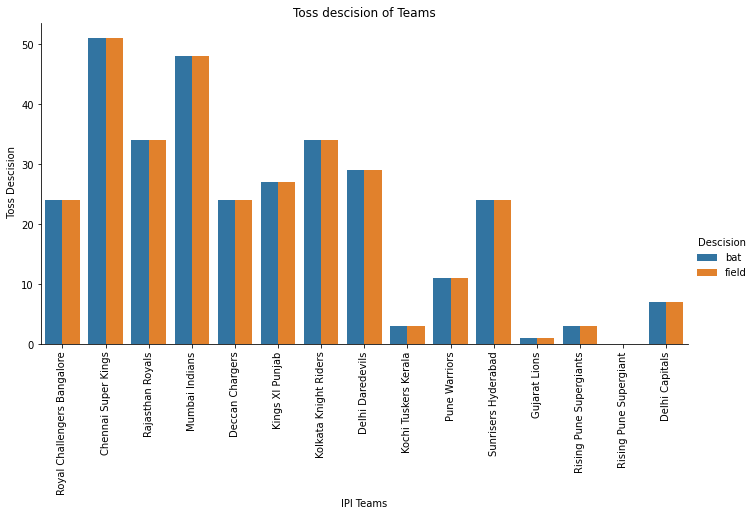

In [ ]:
snb.catplot(x='Toss Winner', y = 'Times', hue= "Descision", data=descision_making,kind= 'bar',height=5 ,aspect =2)
plt.xticks(rotation=90)
plt.title("Toss descision of Teams")
plt.xlabel("IPl Teams")
plt.ylabel(" Toss Descision")

Famous Venues



Text(0, 0.5, ' Venue')

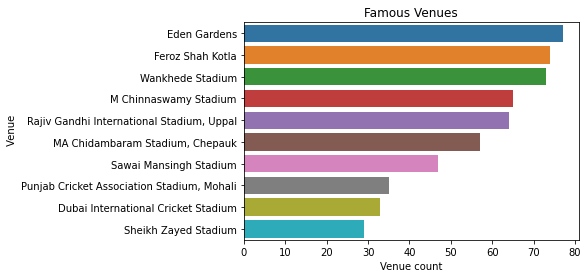

In [ ]:
snb.barplot(x=data['venue'].value_counts().head(10).values,
            y=data['venue'].value_counts().head(10).index ,data=data)
plt.title("Famous Venues")
plt.xlabel("Venue count")
plt.ylabel(" Venue")

Top 5 Umpire_1

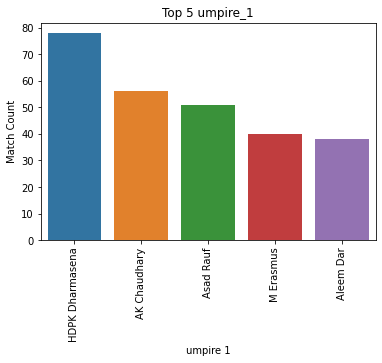

In [ ]:
snb.barplot(x=data['umpire1'].value_counts().head().index,
            y=data['umpire1'].value_counts().head().values,data=data)
plt.xlabel("umpire 1")
plt.ylabel("Match Count")
plt.title('Top 5 umpire_1')
plt.xticks(rotation= 90)
plt.show()

Top 5 Umpire_2

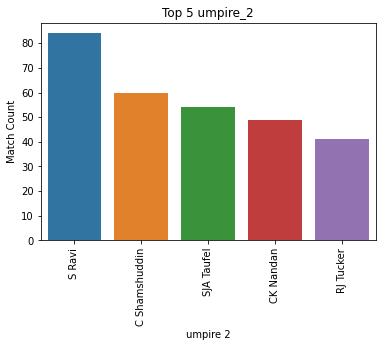

In [ ]:
snb.barplot(x=data['umpire2'].value_counts().head().index,
            y=data['umpire2'].value_counts().head().values,data=data)
plt.xlabel("umpire 2")
plt.ylabel("Match Count")
plt.title('Top 5 umpire_2')
plt.xticks(rotation= 90)
plt.show()

Thank You !! Here we complete our analysis.